In [203]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [204]:
df = pd.read_csv('../data-final.csv', sep = '\t')
df = df[df['IPC'] == 1]
df.drop(['screenw', 'screenh', 'introelapse', 'testelapse', 'endelapse', 'IPC', 'dateload', 'lat_appx_lots_of_err',
        'long_appx_lots_of_err'], axis=1, inplace=True)

In [205]:
pipeline = Pipeline(steps=[('standard_scaler', StandardScaler()),
                          ('minmax_scaler', MinMaxScaler())])

In [206]:
df.shape

(696845, 101)

In [207]:
df = df[df != 0].dropna()

In [208]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,GB
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,5488.0,3656.0,4352.0,2681.0,3272.0,2640.0,1568.0,1640.0,3192.0,SE


# Remove response time outliers

In [209]:
df_time = df.filter(regex='(\w{3}\d+)_E$')

In [210]:
q1 = df_time.quantile(.25)
q3 = df_time.quantile(.75)
IQR = q3 -q1

In [211]:
df_time = df_time[(df_time >= (q1 -1.5*IQR)) & (df_time <= (q3 + 1.5*IQR))].dropna()
df_time.shape

(135862, 50)

In [212]:
df_time.index

Int64Index([      1,       6,      10,      11,      14,      19,      24,
                 28,      29,      37,
            ...
            1015283, 1015286, 1015298, 1015312, 1015316, 1015319, 1015324,
            1015326, 1015337, 1015340],
           dtype='int64', length=135862)

In [213]:
df_no_outliers = df.loc[df_time.index, :].reset_index(drop=True)
df_no_outliers.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,country
0,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,MY
1,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,...,3274.0,2292.0,8305.0,2319.0,4013.0,2661.0,3591.0,3484.0,3872.0,US
2,3.0,3.0,2.0,3.0,3.0,2.0,4.0,3.0,3.0,5.0,...,2105.0,1118.0,1928.0,1606.0,1197.0,964.0,1434.0,1858.0,1193.0,UA
3,3.0,1.0,5.0,3.0,5.0,1.0,5.0,5.0,5.0,3.0,...,7515.0,4332.0,2306.0,1722.0,2294.0,3889.0,2332.0,2590.0,1624.0,PH
4,1.0,5.0,2.0,5.0,1.0,4.0,1.0,2.0,2.0,5.0,...,6052.0,2133.0,3744.0,2075.0,2230.0,2587.0,3350.0,3743.0,636.0,AU


# Normalize data

In [214]:
scaled_df = pd.DataFrame(pipeline.fit_transform(df_no_outliers.drop(columns='country')), columns=df_no_outliers.columns[:-1])
scaled_df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E
0,0.50,1.0,0.50,0.75,0.5,0.50,0.25,1.00,0.00,1.0,...,0.320974,0.467630,0.236902,0.336247,0.623816,0.396941,0.330134,0.442900,0.374879,0.553708
1,0.75,0.5,0.75,0.50,0.5,0.50,1.00,0.50,0.75,0.5,...,0.461576,0.307093,0.313845,0.879075,0.305000,0.474207,0.323208,0.469836,0.421875,0.679223
2,0.50,0.5,0.25,0.50,0.5,0.25,0.75,0.50,0.50,1.0,...,0.228708,0.197410,0.165275,0.223342,0.211184,0.152819,0.117011,0.202085,0.224927,0.285021
3,0.50,0.0,1.00,0.50,1.0,0.00,1.00,1.00,1.00,0.5,...,0.626652,0.705010,0.572007,0.262211,0.226447,0.278019,0.472418,0.313555,0.313590,0.348440
4,0.00,1.0,0.25,1.00,0.0,0.75,0.00,0.25,0.25,1.0,...,0.123715,0.567743,0.293723,0.410077,0.272895,0.270714,0.314216,0.439921,0.453246,0.203061


# Fitting KMeans on all data (answers + response time)

In [215]:
k_means_all_data = KMeans(n_clusters=5,max_iter=1000, random_state=42, n_jobs=-1)
k_means_all_data.fit(scaled_df)
k_means_all_data.labels_

array([1, 3, 4, ..., 3, 4, 4])

In [216]:
df_no_outliers['label'] = k_means_all_data.labels_ + 1

# Describing each group

In [217]:
df_agg_answer =df_no_outliers.groupby('label').mean().filter(regex='(\w{3}\d+)$')
df_agg_answer

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
label,,,,,,,,,,,,,,,,,,,,,
1,2.043577,3.508031,2.653304,3.691468,2.514697,2.874905,2.046709,3.767214,2.646727,4.041206,...,3.926670,1.870699,3.825153,2.018925,3.848060,2.046486,4.183034,3.533131,3.933650,3.862914
2,2.061116,3.303438,3.057385,3.724028,2.933011,2.633443,2.184211,4.056348,2.298912,4.160615,...,3.823216,2.015305,3.945932,1.988737,3.758231,1.959820,4.123130,3.232234,4.312420,3.834237
3,1.712090,3.689324,2.197099,4.183101,2.240214,3.212902,1.699607,4.173323,2.094310,4.553559,...,3.770213,2.276148,4.174478,2.038821,3.451961,2.021972,3.826388,3.425695,4.327452,3.779197
4,3.486198,1.910230,4.319048,2.192762,4.271193,1.624692,3.882988,2.757934,3.816548,2.493986,...,4.108463,1.679612,4.113498,1.759057,4.187038,1.681785,4.395595,3.515867,4.137625,4.295609
5,3.413780,1.944025,3.735647,2.510309,4.034673,1.793572,3.601470,2.773260,3.804685,3.014122,...,4.043084,1.969123,4.349427,1.864695,4.022055,1.734314,4.138041,3.682647,4.281587,4.259292


In [218]:
df_no_outliers.groupby('label').count()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,country
label,,,,,,,,,,,,,,,,,,,,,
1,22351,22351,22351,22351,22351,22351,22351,22351,22351,22351,...,22351,22351,22351,22351,22351,22351,22351,22351,22351,22351
2,28945,28945,28945,28945,28945,28945,28945,28945,28945,28945,...,28945,28945,28945,28945,28945,28945,28945,28945,28945,28945
3,27717,27717,27717,27717,27717,27717,27717,27717,27717,27717,...,27717,27717,27717,27717,27717,27717,27717,27717,27717,27717
4,27604,27604,27604,27604,27604,27604,27604,27604,27604,27604,...,27604,27604,27604,27604,27604,27604,27604,27604,27604,27604
5,29245,29245,29245,29245,29245,29245,29245,29245,29245,29245,...,29245,29245,29245,29245,29245,29245,29245,29245,29245,29245


Every class has pretty much the same maount of observations (range is around 7000).

## Most agreeable question for each group

In [219]:
for i in range(1,6):
    print(f'Class {i}: {df_agg_answer.loc[i, :].sort_values(ascending=False).index[0]} avg answer: {df_agg_answer.loc[i, :].sort_values(ascending=False).values[0]}')

Class 1: OPN7 avg answer: 4.183034316137981
Class 2: AGR4 avg answer: 4.39081015719468
Class 3: EST3 avg answer: 4.588591838943609
Class 4: AGR2 avg answer: 4.437074337052601
Class 5: OPN3 avg answer: 4.3494272525217985


Most agreeable questions:  
* *Class 1* **OPN7** - I am quick to understand things. 
* *Class 2* **AGR4** - I sympathize with others' feelings. 
* *Class 3* **EST3** - I worry about things.  
* *Class 4* **AGR2** - I am interested in people.  
* *Class 5* **OPN3** - I have a vivid imagination.

Looking at most agreeable questions we can assume that class 3 could be the most insecure.

## Least agreeable question for each group

In [220]:
for i in range(1,6):
    print(f'Class {i}: {df_agg_answer.loc[i, :].sort_values().index[0]} avg answer: {df_agg_answer.loc[i, :].sort_values().values[0]}')

Class 1: OPN2 avg answer: 1.8706992975705785
Class 2: AGR1 avg answer: 1.66039039557782
Class 3: EXT7 avg answer: 1.699606739546127
Class 4: AGR7 avg answer: 1.6244747138095927
Class 5: OPN6 avg answer: 1.7343135578731408


Least agreeable questions:  
* *Class 1* **OPN2** - I have difficulty understanding abstract ideas.
* *Class 2* **AGR1** - I feel little concern for others.
* *Class 3* **EXT7** - I talk to a lot of different people at parties. 
* *Class 4* **AGR7** - I am not really interested in others.
* *Class 5* **OPN6** - I do not have a good imagination.

Looking on both most and least agreeable questions we can confirm that:  
* Class 1 perceive themselves as smart,  
* Class 2 and Class 4 are caring,  
* Class 3 is insecure,  
* Class 5 could be creative.

## 5 top and bottom questions for each class

In [221]:
import ipywidgets as widgets
from IPython.display import display, clear_output

### Class 1

**TOP:**  
OPN7	I am quick to understand things.  
OPN10	I am full of ideas.  
OPN9	I spend time reflecting on things.  
OPN1    I have a rich vocabulary.  
CSN3    I pay attention to details.

**BOTTOM:**  
OPN2	I have difficulty understanding abstract ideas.  
OPN4	I am not interested in abstract ideas.  
EXT1	I am the life of the party.  
OPN6	I do not have a good imagination.  
EXT7	I talk to a lot of different people at parties.

People who belong to class 1 for sure perceive themselves as smart, creative people. However from some of bottom question we can assume that they also could be a bit shy.

### Class 2

**TOP:**  
AGR4	I sympathize with others' feelings.  
OPN9	I spend time reflecting on things.  
CSN3	I pay attention to details.  
CSN7	I like order.  
EXT10	I am quiet around strangers.

**BOTTOM:**  
AGR1	I feel little concern for others.  
AGR3	I insult people.  
AGR5	I am not interested in other people's problems.  
OPN6	I do not have a good imagination.  
AGR7	I am not really interested in others.

For people from class 2 the most important part of life are other people. They perceive themselves as kind but detail oriented people who like order.

### Class 3

**TOP:**  
EST3	I worry about things.  
EXT10	I am quiet around strangers.  
EST1	I get stressed out easily.  
OPN9	I spend time reflecting on things.  
EXT4	I keep in the background.

**BOTTOM:**  
EXT7	I talk to a lot of different people at parties.  
EXT1	I am the life of the party.  
EST4	I seldom feel blue.  
CSN5	I get chores done right away.  
OPN6	I do not have a good imagination.

Class 3 is the most insecure and shy of all five classes. We can say that people who belong to third class could be a bit depressed and unorganized.

### Class 4

**TOP:**  
AGR2	I am interested in people.  
OPN7	I am quick to understand things.  
EXT3	I feel comfortable around people.  
OPN10	I am full of ideas.  
EXT5	I start conversations.

**BOTTOM:**  
AGR7	I am not really interested in others.  
EXT6	I have little to say.  
OPN2	I have difficulty understanding abstract ideas.  
OPN6	I do not have a good imagination.  
EST8	I have frequent mood swings.

Class 4 is combinaton of class 1 and 2. People in this class are smart and self confident. Have stable emotions and perceive thmecelves as creative.

### Class 5

**TOP:**  
OPN3	I have a vivid imagination.  
EST3	I worry about things.  
AGR2	I am interested in people.  
OPN9	I spend time reflecting on things.  
OPN10	I am full of ideas.

**BOTTOM:**  
OPN6	I do not have a good imagination.  
EXT6	I have little to say.  
OPN4	I am not interested in abstract ideas.  
AGR7	I am not really interested in others.  
EXT2	I don't talk a lot.

Class 5 could be called 'middle one'. People from this class like others (and for sure are talkative) but also are insecure.

### Widget for top/bottom questions for each class

In [222]:
import joblib

questions = joblib.load('../questions.joblib')

RadioButtons(options=('Top', 'Bottom'), value='Top')

IntSlider(value=7, description='No of questions', max=10, min=1)

Dropdown(description='Class:', index=3, options=(1, 2, 3, 4, 5), value=4)

Button(description='Click', style=ButtonStyle())

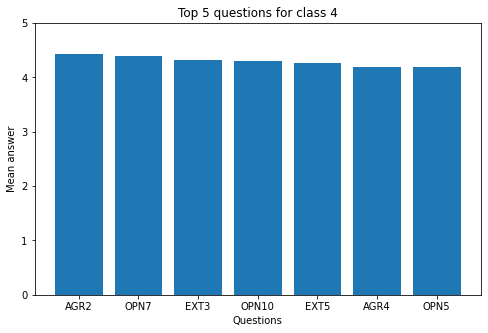

AGR2 - I am interested in people.
OPN7 - I am quick to understand things.
EXT3 - I feel comfortable around people.
OPN10 - I am full of ideas.
EXT5 - I start conversations.
AGR4 - I sympathize with others' feelings.
OPN5 - I have excellent ideas.


In [223]:
def click(button):
    clear_output()
    if side.value == 'Top':
        ascending = False
    else:
        ascending = True
    plt.figure(figsize=(8,5))
    plt.bar(df_agg_answer.loc[choice_widget.value,:].sort_values(ascending=ascending)[:no_columns.value].index, 
           df_agg_answer.loc[choice_widget.value,:].sort_values(ascending=ascending)[:no_columns.value].values)
    plt.title(f'{side.value} 5 questions for class {choice_widget.value}')
    plt.xlabel('Questions')
    plt.ylabel('Mean answer')
    plt.ylim(top=5)
    display(side)
    display(no_columns)
    display(choice_widget)
    display(button)
    plt.show()
    for i in df_agg_answer.loc[choice_widget.value,:].sort_values(ascending=ascending)[:no_columns.value].index:
        print(f'{i} - {questions[i]}')
    

side = widgets.RadioButtons(
    options=['Top', 'Bottom']
)
display(side)
no_columns = widgets.IntSlider(
    value=5,
    min=1,
    max=10,
    step=1,
    description='No of questions'
)
display(no_columns)
choice_widget = widgets.Dropdown(options=[1,2,3,4,5], description='Class:')
display(choice_widget)
button = widgets.Button(description='Click')
button.on_click(click)
display(button)

In [224]:
question_choice = widgets.Dropdown(options=list(questions.keys()), description='Class:')

def question_plot(button):
    clear_output()
    plt.figure(figsize = (8,5))
    sns.barplot(x = df_agg_answer.index, y=df_agg_answer[question_choice.value])
    plt.title(questions[question_choice.value], fontsize=20)
    plt.xlabel('Classes')
    plt.ylim(top=5)
    display(question_choice)
    display(button2)
    plt.show()
    
button2 = widgets.Button(description='Click')
button2.on_click(question_plot)

Dropdown(description='Class:', index=13, options=('EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT…

Button(description='Click', style=ButtonStyle())

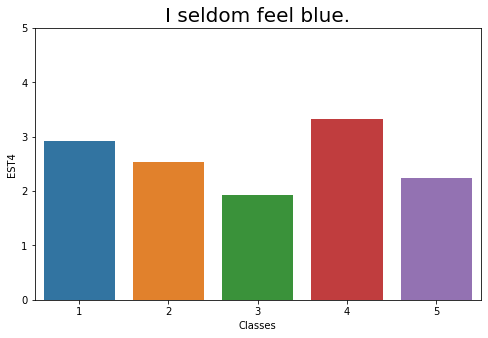

In [225]:
display(question_choice)
display(button2)